In [244]:
import matplotlib.pyplot as plt
import numpy as np

In [245]:

class Restriccion:
    def __init__(self, x1, x2, c, tipo):
        self.x1 = x1
        self.x2 = x2
        self.c = c
        self.valorX0 = 0
        self.valorY0 = 0
        self.listaX = []
        self.listaXhelp = []
        self.listaY = []
        self.listaYhelp = []
        self.totalX = []
        self.totalY = []
        self.tipo = tipo
        
    def agregarRestriccion(self, x1, x2, c, tipo):
        if tipo == 0:
            self.x1 = x1
            self.x2 = x2
            self.c = c
            self.tipo = tipo
        elif tipo == 1:
            self.x1 = -x1
            self.x2 = -x2
            self.c = c
            self.tipo = tipo
            
    def puntosEjes(self):
        if self.x1 == 0:
            #0x+3y=6
            self.valorY0 = self.c/self.x2
        elif self.x2 == 0:
            #3x+0y=6
            self.valorX0 = self.c/self.x1
        else:
            #0x+3y=6
            self.valorX0 = self.c/self.x1
            self.valorY0 = self.c/self.x2
            
    def despejar(self):
        self.totalX = np.arange(0,float(self.valorX0)+1)
        self.totalY = np.arange(0,float(self.valorY0)+1)
        if self.x1 == 0.0:
            self.listaY = (self.c+0*self.totalX)/self.x2
            #0x+3y=6
        elif self.x2 == 0.0:
            #2x+0y=6
            self.listaX = (self.c-0*self.totalX)/self.x1
        else:
            #4x+3y=6
            self.listaY = (self.c-self.x1*self.totalX)/self.x2
            
    def graficar(self):
        plt.plot(self.listaY, "red")
        plt.plot(self.listaX, "pink")

In [246]:
class funcionObjetivo:
    def __init__(self,x1,x2,tipo):
        self.x1 = x1
        self.x2 = x2
        self.tipo = tipo
        self.z = 0
        self.puntosFactibles = []

In [247]:
def inputNumerico(string):
    while(True):
        valor = float(input(string))
        if(isinstance(valor, float)):
            return valor
        else:
            print("Error, ingrese un valor numerico")

In [248]:
def inputMinMax(string):
    while(True):
        value = str(input(string))
        if value=="min":
            return value
        elif value=='max':
            return value
        else:
            print("Error, ingrese min o max nuevamente")

In [249]:

print("Ingrese lo coeficientes para X1 e X2 para la Funcion Objetivo: Z = __X1 + __X2")
X1_0 = float(inputNumerico("Coeficiente de X1: "))
X2_0 = float(inputNumerico("Coeficiente de X2: "))
print("Ingrese min para Minimizacion y max para Maximizacion")
tipo = str(inputMinMax("min o max : "))
fObjetivo = funcionObjetivo(X1_0,X2_0,tipo)


Ingrese lo coeficientes para X1 e X2 para la Funcion Objetivo: Z = __X1 + __X2
Ingrese min para Minimizacion y max para Maximizacion


In [250]:
def validacionCantidadR(string):
    while(True):
        r = int(input(string))
        if (r < 6):
            return r
        else:
            print("Ingrese un valor menor o igual a 5")

In [251]:
#Cantidad de restricciones
print("Ingrese cantidad de restricciones (5 o menos)")
r = validacionCantidadR("Valor: ")

Ingrese cantidad de restricciones (5 o menos)


In [252]:
def agregarRestriccion2(R1,R2,I,C):
    if I==0:
        return [[R1,R2,C,I]]
    elif I==1:
        return [[-R1,-R2,-C,0]]
    elif I==2:
        return [[R1,R2,I,C],[-R1,-R2,-C,0]]

In [253]:
def validacionIgualdad(string):
    while(True):
        igualdad = input(string)
        if igualdad=="<=":
            return 0
        elif igualdad==">=":
            return 1
        elif igualdad=="=":
            return 2
        else:
            print("Ingrese un signo valido")

In [254]:
arregloRestricciones = []
arregloRestricciones.clear()
for index in range(r):
    print("Ingrese los coeficientes para la restriccion R",index+1,": __X1 + __X2 (<=, >=, =) C")
    R1 = float(inputNumerico("Coeficiente de X1: "))
    R2 = float(inputNumerico("Coeficiente de X2: "))
    I = float(validacionIgualdad("Signo igualdad: "))
    C = float(inputNumerico("Coeficiente C: "))
    restriccion34 = Restriccion(R1,R2,C,I)
    arregloRestricciones.append(restriccion34)
        
    print(len(arregloRestricciones))


Ingrese los coeficientes para la restriccion R 1 : __X1 + __X2 (<=, >=, =) C
1
Ingrese los coeficientes para la restriccion R 2 : __X1 + __X2 (<=, >=, =) C
2
Ingrese los coeficientes para la restriccion R 3 : __X1 + __X2 (<=, >=, =) C
3
Ingrese los coeficientes para la restriccion R 4 : __X1 + __X2 (<=, >=, =) C
4
Ingrese los coeficientes para la restriccion R 5 : __X1 + __X2 (<=, >=, =) C
5


In [255]:

def hallarPuntos(restriccion):
    valorx=0
    valory=0
    if restriccion[1]==0:
        valorx=restriccion[2]/restriccion[0]
    elif restriccion[0]==0:
        valory=restriccion[2]/restriccion[1]
    else:
        valorx=restriccion[2]/restriccion[0]
        valory=restriccion[2]/restriccion[1]
    #print("valor x: ", valorx)
    #print("valor y: ", valory)
    return valorx,valory

In [256]:

listaVertices = [(0,0)]
def hallarVertices():
    i = 0
    j = i+1
    for restriccion in arregloRestricciones:
        listaVertices.append((restriccion.valorX0, 0.))
        listaVertices.append((0., restriccion.valorY0))
    while i < len(arregloRestricciones)-1:
        while j < len(arregloRestricciones):
            try:
                a = np.array([[arregloRestricciones[i].x1, arregloRestricciones[i].x2],
                               [arregloRestricciones[j].x1, arregloRestricciones[j].x2]])
                b = np.array([arregloRestricciones[i].c,
                              arregloRestricciones[j].c])
                punto = np.linalg.solve(a, b)
                listaVertices.append((punto[0], punto[1]))
            except:
                pass
            j += 1
        i += 1
        j = i+1
    
    i = 0
    while i < len(listaVertices):
        if listaVertices[i][0] < 0 or listaVertices[i][1] < 0:
            listaVertices.remove(listaVertices[i])
        i += 1
        
    new = []
    for i in listaVertices:
        if i not in new:
            new.append(i)
    
    listaVertices[0:len(listaVertices)] = new
    print("listaVertices: ", listaVertices)


listaVertices:  [(0, 0), (3.0, 0.0), (0.0, 2.0), (2.0, 0.0), (0.0, 1.0), (1.6666666666666667, 0.0), (0.0, 1.6666666666666667), (2.0, 0.6666666666666666), (1.5, 1.0), (3.0, 1.0), (2.0, 1.0), (0.6666666666666666, 1.0)]


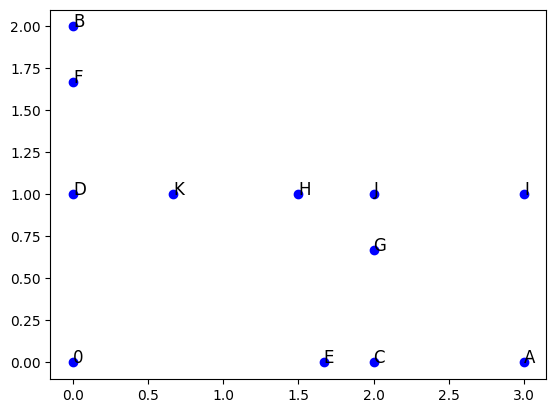

In [257]:

from operator import concat


puntos = []
mayorX = 0
mayorY = 0

for restriccion in arregloRestricciones:
    restriccion.puntosEjes()
    if abs(restriccion.valorX0) > mayorX:
        mayorX = abs(restriccion.valorX0)
    if abs(restriccion.valorY0) > mayorY:
        mayorY = restriccion.valorY0
hallarVertices()


letras = ["0", "A", "B", "C", "D", "E", "F", "G",
          "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q"]

i = 0
for vertice in listaVertices:
    #texto = concat(str(round(vertice[0],1)),", ")
    #texto = concat(texto,str(round(vertice[1],1)))
    #print(texto)
    #plt.annotate(texto, xy=(vertice[0], vertice[1]), fontsize=12)
    plt.annotate(letras[i], xy=(vertice[0], vertice[1]), fontsize=12)
    plt.scatter(vertice[0], vertice[1], color="b")
    i += 1
    


[0. 1. 2. 3.]   [1. 1. 1. 1.]
[0. 1. 2.]   []
[0. 1. 2. 3.]   [ 1.66666667  0.66666667 -0.33333333 -1.33333333]
[0. 1. 2.]   []


Text(0, 0.5, 'valores Y')

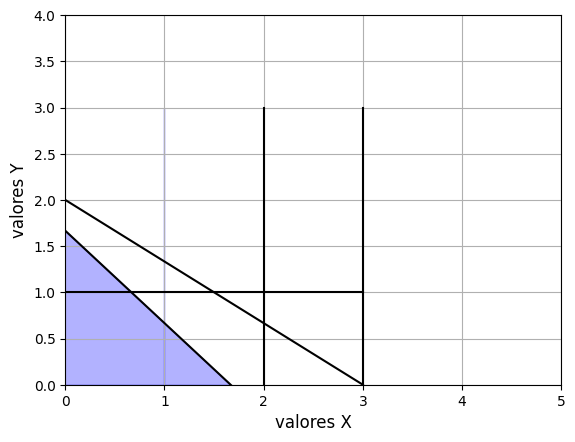

In [296]:
i = 0
listaResultados = []
colores = ["b", "g", "c", "m", "y"]
for p in listaVertices:
    listaResultados.append(
        (letras[i], p[0], p[1], fObjetivo.x1*p[0]+fObjetivo.x2*p[1]))
    i += 1

for res in arregloRestricciones:
    if mayorX <= 0:
        mayorX = mayorY = 10
    res.valorX0 = mayorX
    res.valorY0 = mayorY
    
    res.despejar()
    
    helpY = np.arange(0,float(len(res.listaX)))
    helpX = np.arange(0,float(len(res.listaY)))
    plt.plot(helpX, res.listaY, "k")
    plt.plot(res.listaX, helpY, "k")
   
    seleccion = np.random.randint(len(colores))
    if res.tipo == 1:
        plt.fill_between(res.listaY,res.totalX,color='blue',alpha=0.3)
        #plt.fill_between(res.totalY,res.listaX,color='blue',alpha=0.3)
        print(res.totalX," ",res.listaY)
        print(res.totalY," ",res.listaX)
plt.grid(True)   
plt.ylim(0, mayorY+2)
plt.xlim(0, mayorX+2)
plt.xlabel('valores X', fontsize=12)
plt.ylabel('valores Y', fontsize=12)
#print("arrglo1: ",arregloEcY[0])
#print(newPuntos)
#print(puntos)

